<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px


In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_rows', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [7]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [8]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id

# Vérifier les doublons dans la colonne 'product_id'
doublons = df_erp[df_erp.duplicated(subset='product_id', keep=False)]

# Afficher les lignes en doublon
print(doublons)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?


# Afficher les valeurs distinctes de la colonne 'stock_status'
valeurs_uniques_stock_status = df_erp['stock_status'].unique()
print("Valeurs distinctes de la colonne 'stock_status':", valeurs_uniques_stock_status)

# Filtrer les produits en fonction de leur 'stock_status'
instock_produits = df_erp[df_erp['stock_status'] == 'instock'][['product_id', 'stock_quantity']]
outofstock_produits = df_erp[df_erp['stock_status'] == 'outofstock'][['product_id', 'stock_quantity']]

# Afficher les produits "instock" (quantité > 0)
print("\nProduits en 'instock' (quantité > 0):")
print(instock_produits)

# Afficher les produits "outofstock" (quantité = 0)
print("\nProduits en 'outofstock' (quantité = 0):")
print(outofstock_produits)




Valeurs distinctes de la colonne 'stock_status': ['instock' 'outofstock']

Produits en 'instock' (quantité > 0):
     product_id  stock_quantity
0          3847              16
1          3849              10
3          4032              26
5          4040              12
6          4041              12
7          4042              15
9          4045               5
10         4046               2
12         4048              24
13         4049              25
14         4050              42
17         4053               7
18         4054               6
20         4056              38
21         4057              29
22         4058              39
23         4059              34
24         4060              29
25         4062              30
26         4063              33
27         4064              32
29         4066              27
30         4067              22
31         4068              25
32         4069               4
33         4070              32
34         4071        

In [10]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"


# Création d'une nouvelle colonne 'stock_status_2'
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x == 0 else 'instock')

# Afficher les premières lignes pour vérifier la création de la nouvelle colonne
print(df_erp[['stock_quantity', 'stock_status_2']].head())


   stock_quantity stock_status_2
0              16        instock
1              10        instock
2               0     outofstock
3              26        instock
4               3        instock


In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,True
8,True
9,True


In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset


# Calculer la somme des valeurs True/False dans la comparaison
somme_comparaison = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()


# Afficher le résultat
print(f"La somme des valeurs True est : {somme_comparaison}")


La somme des valeurs True est : 821


In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3


# Trouver les lignes où les colonnes stock_status et stock_status_2 sont différentes
differences = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

# Afficher les lignes qui diffèrent

print(differences[["stock_status", "stock_status_2"]])

# Afficher les valeurs de stock_quantity pour ces lignes spécifiques
print(df_erp.loc[[4, 398, 449, 573], ['stock_quantity', 'stock_status', 'stock_status_2']])



    stock_status stock_status_2
4     outofstock        instock
398      instock     outofstock
449   outofstock        instock
573   outofstock        instock
     stock_quantity stock_status stock_status_2
4                 3   outofstock        instock
398               0      instock     outofstock
449             -10   outofstock        instock
573              -1   outofstock        instock


In [14]:
#Corriger la ou les données incohérentes

#Verification en utilisant le même code que plus haut pour afficher les problemes

# Remplacer les valeurs négatives dans stock_quantity par 0
df_erp["stock_quantity"] = df_erp["stock_quantity"].apply(lambda x: 0 if x < 0 else x)

# Forcer le statut 'outofstock' dans stock_status_2 quand stock_quantity est 0
df_erp.loc[df_erp["stock_quantity"] == 0, "stock_status_2"] = "outofstock"

# Synchroniser stock_status avec stock_status_2
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status"] = df_erp["stock_status_2"]

# Vérification en affichant les lignes spécifiques pour s'assurer que les corrections sont bien effectuées
print(df_erp.loc[[4, 398, 449, 573], ['stock_quantity', 'stock_status', 'stock_status_2']])



     stock_quantity stock_status stock_status_2
4                 3      instock        instock
398               0   outofstock     outofstock
449               0   outofstock     outofstock
573               0   outofstock     outofstock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

# Vérification des prix : Y a-t-il des prix non renseignés, négatifs ou nuls ?

# Afficher le nombre d'articles avec un prix non renseigné (NaN)
nombres_non_renseignes = df_erp['price'].isnull().sum()
print("Nombres d'articles avec un prix non renseigné : {}".format(nombres_non_renseignes))

# Afficher le prix minimum de la colonne "price"
prix_minimum = df_erp['price'].min()
print("Prix minimum dans la colonne 'price' : {}".format(prix_minimum))

# Afficher le prix maximum de la colonne "price"
prix_maximum = df_erp['price'].max()
print("Prix maximum dans la colonne 'price' : {}".format(prix_maximum))

# Afficher les prix inférieurs à 0
prix_negatifs = df_erp[df_erp['price'] < 0]
print("Articles avec un prix inférieur à 0 :")
print(prix_negatifs[['product_id', 'price']])

# Que faire avec les prix négatifs ?
# Remplacer les prix négatifs par 0
df_erp.loc[df_erp['price'] < 0, 'price'] = 0
print("\nPrix négatifs remplacés par 0.")


Nombres d'articles avec un prix non renseigné : 0
Prix minimum dans la colonne 'price' : -20.0
Prix maximum dans la colonne 'price' : 225.0
Articles avec un prix inférieur à 0 :
     product_id  price
151        4233  -20.0
469        5017   -8.0
739        6594   -9.1

Prix négatifs remplacés par 0.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

# Vérification de la colonne stock_quantity

# Afficher la quantité minimum de la colonne "stock_quantity"
quantite_minimum = df_erp['stock_quantity'].min()
print("Quantité minimum dans la colonne 'stock_quantity' : {}".format(quantite_minimum))

# Afficher la quantité maximum de la colonne "stock_quantity"
quantite_maximum = df_erp['stock_quantity'].max()
print("Quantité maximum dans la colonne 'stock_quantity' : {}".format(quantite_maximum))

# Afficher les stocks inférieurs à 0
stocks_negatifs = df_erp[df_erp['stock_quantity'] < 0]
print("Articles avec un stock inférieur à 0 :")
print(stocks_negatifs[['product_id', 'stock_quantity']])

#Qu'est ce qu'il faut en faire?
# Remplacer les stocks négatifs par 0
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0
print("\nStocks négatifs remplacés par 0.")


Quantité minimum dans la colonne 'stock_quantity' : 0
Quantité maximum dans la colonne 'stock_quantity' : 145
Articles avec un stock inférieur à 0 :
Empty DataFrame
Columns: [product_id, stock_quantity]
Index: []

Stocks négatifs remplacés par 0.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [17]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?

# Afficher les valeurs distinctes dans la colonne 'onsale_web'
valeurs_uniques_onsale_web = df_erp['onsale_web'].unique()
print("Valeurs distinctes dans la colonne 'onsale_web' : {}".format(valeurs_uniques_onsale_web))

# Compter le nombre de produits en vente et non en vente
produits_en_vente = df_erp['onsale_web'].value_counts()
print("\nNombre de produits en vente (True/False) :")
print(produits_en_vente)

Valeurs distinctes dans la colonne 'onsale_web' : [1 0]

Nombre de produits en vente (True/False) :
onsale_web
1    716
0    109
Name: count, dtype: int64


In [18]:
#Quelles sont les colonnes à conserver selon vous?

# product_id : Identifiant unique du produit, indispensable pour toute analyse.
# price : Prix de vente du produit, essentiel pour les calculs de marges et de chiffres d'affaires.
# stock_quantity : Quantité en stock, utilisée pour analyser la disponibilité des produits.
# onsale_web : Indique si le produit est en vente sur le site web (1 = en vente, 0 = non en vente).
# stock_status : pas besoin de la guarder car stock_quantity suffit à savoir le statut des stocks.
# purchase_price : Prix d'achat du produit, indispensable pour calculer les marges.

In [19]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".

df_erp.drop(columns=["stock_status_2"], inplace=True)

print(df_erp.head())



   product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3      instock           23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [20]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
prix_non_renseignes = df_erp[df_erp['purchase_price'].isnull()]
print("Prix non renseignés dans la colonne 'purchase_price' :")
print(prix_non_renseignes[['product_id', 'purchase_price']])

#Afficher le prix minimum de la colonne "purchase_price"
prix_minimum = df_erp['purchase_price'].min()
print(f"\nPrix minimum dans la colonne 'purchase_price' : {prix_minimum}")

#Afficher le prix maximum de la colonne "purchase_price"
prix_maximum = df_erp['purchase_price'].max()
print(f"Prix maximum dans la colonne 'purchase_price' : {prix_maximum}")

Prix non renseignés dans la colonne 'purchase_price' :
Empty DataFrame
Columns: [product_id, purchase_price]
Index: []

Prix minimum dans la colonne 'purchase_price' : 2.74
Prix maximum dans la colonne 'purchase_price' : 137.81


In [21]:
#Dimension du dataset
dimensions = df_web.shape
print(f"Dimensions du dataset web.xlsx : {dimensions}")

#Nombre d'observations
nombre_observations = df_web.shape[0]
print(f"Nombre d'observations : {nombre_observations}")

#Nombre de caractéristiques
nombre_caracteristiques = df_web.shape[1]
print(f"Nombre de caractéristiques : {nombre_caracteristiques}")

Dimensions du dataset web.xlsx : (1513, 29)
Nombre d'observations : 1513
Nombre de caractéristiques : 29


In [22]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [23]:
#Selon vous, quelles sont les colonnes à conserver ?

# sku : Identifiant unique du produit (même s'il y a quelques valeurs manquantes, c'est crucial pour identifier les produits).
# total_sales : Donnée essentielle pour analyser la popularité des produits.
# post_date et post_modified : Date de création et de modification des produits. Utile pour suivre les mises à jour des produits dans le temps.
# product_type : Type de produit, pertinent pour filtrer ou classer les produits.
# post_title : Titre du produit, crucial pour l'identification.
# guid : URL permanente du produit, peut être utile pour retrouver un produit sur le site.
# post_type : Type d'entrée dans la base de données, utile pour filtrer les produits en fonction de leur type.



In [24]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération

# Liste des colonnes à conserver
colonnes_a_conserver = [
    'sku', 'total_sales', 'post_date', 'post_modified',
    'product_type', 'post_title', 'guid', 'post_type'
]

# Supprimer toutes les colonnes non listées directement dans le DataFrame original
df_web = df_web[colonnes_a_conserver]

# Afficher les premières lignes pour vérifier que les bonnes colonnes sont conservées
df_web.head()



,sku,total_sales,post_date,post_modified,product_type,post_title,guid,post_type
0,11862,3.0,2018-02-12 13:46:23,2019-01-31 12:12:56,Vin,Gilles Robin Hermitage Rouge 2012,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,2018-04-17 15:29:17,2020-07-07 10:05:02,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,2019-03-19 10:06:47,2020-04-25 21:40:31,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,2018-02-15 14:05:06,2020-08-27 18:55:03,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,2019-03-27 18:05:09,2020-07-25 15:45:02,Vin,Agnès Levet Côte Rôtie Maestria 2017,https://www.bottle-neck.fr/?post_type=product&...,product


In [25]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

df_web["sku"].unique()



array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [26]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

# 1. Lignes avec des 'sku' manquants
# 2. Lignes avec des 'sku' non alphanumériques
# 3. Lignes avec des 'sku' ayant une longueur incorrecte

In [27]:
#Identifier les lignes sans code articles
lignes_sans_sku = df_web[df_web['sku'].isna()]
print("Lignes sans code article (sku manquant) :")
(lignes_sans_sku)

Lignes sans code article (sku manquant) :


,sku,total_sales,post_date,post_modified,product_type,post_title,guid,post_type
8,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
30,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
37,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
41,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
47,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
55,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
75,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
94,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
127,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [28]:
# Filtrer le DataFrame pour ne garder que les lignes où la colonne "sku" n'est pas vide (non null).
df_web = df_web[df_web["sku"].notnull()]

In [29]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre

# Correction des SKU pour ces lignes contenant des informations
df_web.at[1084, 'sku'] = '16516'  # Correction du SKU pour la ligne 1084
df_web.at[1087, 'sku'] = '16517'  # Correction du SKU pour la ligne 1087

# Confirmation des corrections effectuées
print(f"Corrections effectuées pour les lignes : \n{df_web.loc[[1084, 1087], ['sku', 'post_title', 'total_sales']]}")




Corrections effectuées pour les lignes : 
        sku post_title  total_sales
1084  16516        NaN          NaN
1087  16517        NaN          NaN


<ipython-input-29-e5868e73c370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web.at[1084, 'sku'] = '16516'  # Correction du SKU pour la ligne 1084


In [30]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
# Vérifier si chaque ligne de la colonne 'sku' est unique
df_web[df_web["sku"] == "13127-1"]

,sku,total_sales,post_date,post_modified,product_type,post_title,guid,post_type
272,13127-1,4.0,2020-06-09 15:42:04,2020-07-20 17:09:06,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&...,product
1117,13127-1,4.0,2020-06-09 15:42:04,2020-07-20 17:09:06,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [31]:
# Filtrer pour ne garder que les lignes où 'post_type' est 'product'
df_web = df_web[df_web['post_type'] == 'product']

In [32]:
# Vérifier si chaque ligne de la colonne 'sku' est unique dans le dataframe filtré
nb_total_skus = df_web['sku'].shape[0]
nb_skus_uniques = df_web['sku'].nunique()

if nb_total_skus == nb_skus_uniques:
    print("Toutes les lignes de la colonne 'sku' sont uniques dans le dataset filtré.")
else:
    nb_doublons = nb_total_skus - nb_skus_uniques
    print(f"Il y a {nb_doublons} doublon(s) dans la colonne 'sku' après avoir supprimé les 'attachment'.")


Toutes les lignes de la colonne 'sku' sont uniques dans le dataset filtré.


In [33]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_sku = df_web[df_web['sku'].isna()]

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_sans_sku.info()

#3 - Que constatez-vous?

# Aucune des colonnes n'a de valeurs renseignées. Cela signifie que pour ces lignes que toutes les colonnes sont vides.


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            0 non-null      object        
 1   total_sales    0 non-null      float64       
 2   post_date      0 non-null      datetime64[ns]
 3   post_modified  0 non-null      datetime64[ns]
 4   product_type   0 non-null      object        
 5   post_title     0 non-null      object        
 6   guid           0 non-null      object        
 7   post_type      0 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 0.0+ bytes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [34]:
#Dimension du dataset
dimension_dataset = df_liaison.shape
print(f"Dimension du dataset : {dimension_dataset}")
#Nombre d'observations
nombre_observations = df_liaison.shape[0]
print(f"Nombre d'observations : {nombre_observations}")
#Nombre de caractéristiques
nombre_caracteristiques = df_liaison.shape[1]
print(f"Nombre de caractéristiques : {nombre_caracteristiques}")

Dimension du dataset : (825, 2)
Nombre d'observations : 825
Nombre de caractéristiques : 2


In [35]:
#Consulter le nombre de colonnes
nombre_colonnes = df_liaison.shape[1]
print(f"Nombre de colonnes : {nombre_colonnes}")
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
info_colonnes = df_liaison.info()
print(info_colonnes)

Nombre de colonnes : 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None


In [36]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?

# Nombre total de valeurs dans la colonne
nb_total_product_ids = df_liaison['product_id'].shape[0]

# Nombre de valeurs uniques dans la colonne
nb_product_ids_uniques = df_liaison['product_id'].nunique()

# Vérification de l'unicité
if nb_total_product_ids == nb_product_ids_uniques:
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    nb_doublons = nb_total_product_ids - nb_product_ids_uniques
    print(f"Il y a {nb_doublons} doublon(s) dans la colonne 'product_id'.")


Toutes les valeurs de la colonne 'product_id' sont uniques.


In [37]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?

# Identifier les valeurs sans correspondance dans la colonne "id_web"
valeurs_sans_correspondance_id_web = df_liaison[df_liaison['id_web'].duplicated(keep=False)]

# Vérifier s'il y a des valeurs sans correspondance
if valeurs_sans_correspondance_id_web.empty:
    print("Toutes les valeurs de la colonne 'id_web' sont uniques et ont une correspondance.")
else:
    nb_valeurs_sans_correspondance_id_web = valeurs_sans_correspondance_id_web.shape[0]
    print(f"Il y a {nb_valeurs_sans_correspondance_id_web} valeur(s) sans correspondance dans la colonne 'id_web'.")



Il y a 91 valeur(s) sans correspondance dans la colonne 'id_web'.


In [38]:
#Avons-nous des articles sans correspondances?

# Vérifier les lignes où 'product_id' ou 'id_web' est manquant
articles_sans_correspondance = df_liaison[df_liaison['product_id'].isnull() | df_liaison['id_web'].isnull()]

# Afficher les lignes sans correspondance
print("Articles sans correspondance :")
print(articles_sans_correspondance)

# Nombre d'articles sans correspondance
nb_sans_correspondance = articles_sans_correspondance.shape[0]
print(f"Nombre d'articles sans correspondance : {nb_sans_correspondance}")



Articles sans correspondance :
    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
151    NaN        4233
184    NaN        4278
185    NaN        4279
234    NaN        4565
238    NaN        4577
239    NaN        4578
242    NaN        4594
246    NaN        4599
292    NaN        4659
318    NaN        4692
319    NaN        4693
320    NaN        4697
321    NaN        4698
322    NaN        4702
340    NaN        4721
352    NaN        4738
356    NaN        4744
384    NaN        4798
396    NaN        4874
416    NaN        4911
449    NaN        4973
469    NaN        5017
472    NaN        5020
486    NaN        5070
487    NaN        5075
541    NaN        5560
547    NaN        5569
618    NaN        5805
621    NaN        5808
659    NaN        5952
696    NaN        6125
724    NaN        6324
726    NaN        6327
739    NaN        6594
761    NaN        6821
762    NaN        6824
763

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [39]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='outer', indicator=True )
df_merge.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both


In [40]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?

# Filtrer les lignes où il n'y a pas de correspondance dans l'un des deux fichiers (différentes de 'both')
non_matching = df_merge[df_merge['_merge'] != 'both']

# Afficher le nombre de lignes sans correspondance
print(f"Nombre de lignes sans correspondance : {non_matching.shape[0]}")

# Supprimer la colonne '_merge'
df_merge = df_merge.drop(columns=['_merge'], errors='ignore')




Nombre de lignes sans correspondance : 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [41]:
#Fusionnez les datasets df_merge et df_web'

# Fusionner les DataFrames en utilisant 'id_web' et 'sku'
df_final = pd.merge(df_merge, df_web, left_on='id_web', right_on='sku', how='outer' , indicator=True)
df_final



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_date,post_modified,product_type,post_title,guid,post_type,_merge
0,4729,1,8.60,26,instock,4.22,38,38,10.0,2018-04-18 12:25:58,2020-08-27 17:15:03,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,https://www.bottle-neck.fr/?post_type=product&...,product,both
1,4634,1,41.00,11,instock,20.12,41,41,6.0,2018-04-14 12:01:43,2020-08-03 10:25:02,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,https://www.bottle-neck.fr/?post_type=product&...,product,both
2,4141,1,39.00,123,instock,24.86,304,304,8.0,2018-02-13 12:57:44,2020-08-27 11:25:02,Champagne,Champagne Gosset Grande Réserve,https://www.bottle-neck.fr/?post_type=product&...,product,both
3,5932,1,59.90,13,instock,27.18,523,523,0.0,2019-04-06 15:25:58,2020-08-12 16:45:03,Cognac,Cognac Normandin Mercier VFC,https://www.bottle-neck.fr/?post_type=product&...,product,both
4,5047,1,22.50,76,instock,13.78,531,531,8.0,2018-07-18 15:58:02,2020-08-27 15:35:03,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,https://www.bottle-neck.fr/?post_type=product&...,product,both
5,4631,1,76.80,1,instock,38.49,791,791,1.0,2018-04-14 11:54:47,2020-04-21 14:00:04,Vin,Marcel Windholtz Eau de Vie de Baie de Houx,https://www.bottle-neck.fr/?post_type=product&...,product,both
6,4630,1,62.40,1,instock,33.21,793,793,1.0,2018-04-14 11:52:20,2019-12-23 09:30:54,Vin,Marcel Windholtz Eau de Vie de Coing,https://www.bottle-neck.fr/?post_type=product&...,product,both
7,4635,1,62.40,12,instock,31.92,798,798,8.0,2018-04-14 12:05:09,2020-07-23 10:15:03,Vin,Marcel Windholtz Eau de Vie de Kirsch d'Alsace...,https://www.bottle-neck.fr/?post_type=product&...,product,both
8,4628,1,39.60,8,instock,21.07,802,802,5.0,2018-04-14 11:48:19,2019-02-09 14:00:03,Vin,Marcel Windholtz Eau de Vie de Marc de Muscat,https://www.bottle-neck.fr/?post_type=product&...,product,both
9,4633,1,52.40,5,instock,27.61,804,804,3.0,2018-04-14 11:59:32,2020-07-23 10:15:03,Vin,Marcel Windholtz Eau de Vie de Mirabelle d'Als...,https://www.bottle-neck.fr/?post_type=product&...,product,both


In [42]:
#Avons-nous des lignes sans correspondances?

# Filtrer les lignes qui n'ont pas de correspondance dans l'un des datasets
lignes_sans_correspondance_merge = df_final[df_final['_merge'] != 'both']

# Afficher les lignes sans correspondance
print(f"Nombre de lignes sans correspondance : {lignes_sans_correspondance_merge.shape[0]}")
lignes_sans_correspondance_merge.head()  # Afficher quelques exemples

Nombre de lignes sans correspondance : 111


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_date,post_modified,product_type,post_title,guid,post_type,_merge
81,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
127,5957,0,39.0,0,outofstock,20.75,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
139,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
180,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
185,5955,0,27.3,0,outofstock,13.68,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

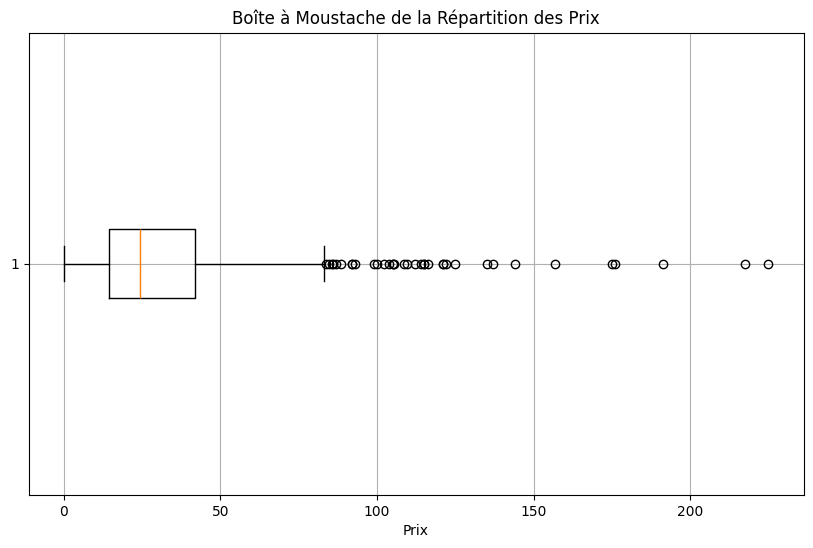

In [43]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

import matplotlib.pyplot as plt

# Création de la boîte à moustache pour la répartition des prix
plt.figure(figsize=(10, 6))
plt.boxplot(df_final['price'].dropna(), vert=False)  # On enlève les valeurs manquantes et on affiche horizontalement
plt.title('Boîte à Moustache de la Répartition des Prix')
plt.xlabel('Prix')
plt.grid(True)

# Afficher le graphique
plt.show()

In [44]:
#Autre méthode avec plotly express

import plotly.express as px

fig = px.box(df_final, y="price", title="Boîte à Moustache de la Répartition des Prix", labels={"price": "Prix"})

fig.show()



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [45]:
#Calculer la moyenne du prix
moyenne_prix = df_final['price'].mean()

#Calculer l'écart-type du prix
ecart_type_prix = df_final['price'].std()

#Calculer le Z-score
df_final['z_score'] = (df_final['price'] - moyenne_prix) / ecart_type_prix

print(f"Moyenne du prix : {moyenne_prix}")
print(f"Écart-type du prix : {ecart_type_prix}")
print(df_final[['price', 'z_score']].head())

Moyenne du prix : 32.232666666666674
Écart-type du prix : 26.645280282385126
   price   z_score
0    8.6 -0.886936
1   41.0  0.329039
2   39.0  0.253979
3   59.9  1.038358
4   22.5 -0.365268


In [46]:
#Quel est le seuil prix dont z-score est supérieur à 3?

# Filtrer les prix dont le Z-score est supérieur à 3
prix_seuil_min = df_final[df_final['z_score'] > 3]['price'].min()

# Afficher le prix minimum correspondant
print(f"Le prix minimum dont le Z-score est supérieur à 3 est : {prix_seuil_min}")




Le prix minimum dont le Z-score est supérieur à 3 est : 114.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [47]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
description = df_final['price'].describe()

print(description)


count    825.000000
mean      32.232667
std       26.645280
min        0.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [48]:
#Définissez un seuil pour les articles "outliers" en prix

# Calcul des quartiles et de l'écart interquartile
q1 = df_final['price'].quantile(0.25)
q3 = df_final['price'].quantile(0.75)
iqr = q3 - q1  # Écart interquartile

# Définir les bornes pour détecter les valeurs aberrantes
borne_inferieure = max(0, q1 - 1.5 * iqr)
borne_superieure = q3 + 1.5 * iqr

print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Filtrer les articles dont le prix est un outlier
outliers = df_final[(df_final['price'] < borne_inferieure) | (df_final['price'] > borne_superieure)]

# Afficher les outliers identifiés
print("Articles outliers :")
print(outliers[['price']])

# Afficher le nombre d'articles outliers
print(f"Nombre d'articles outliers : {outliers.shape[0]}")



Borne inférieure : 0
Borne supérieure : 83.25
Articles outliers :
     price
22   108.5
23   104.0
24   176.0
33   157.0
53    99.0
54   105.0
56    88.4
87   115.0
88   105.0
89   109.6
143   85.6
149   86.8
150  112.0
156   83.7
157  115.0
171  137.0
204  217.5
205  105.6
233  114.0
234   93.0
235  122.0
240  102.3
256  124.8
257  135.0
269  191.3
281  121.0
282  121.0
291  116.4
313  175.0
370  100.0
567  225.0
730   92.0
734   86.1
745  144.0
762   84.7
770   92.0
Nombre d'articles outliers : 36


In [49]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Nombre d'articles outliers
nb_outliers = outliers.shape[0]

# Nombre total d'articles dans le catalogue
nb_total_articles = df_final.shape[0]

# Calcul de la proportion d'outliers
proportion_outliers = (nb_outliers / nb_total_articles) * 100

# Affichage des résultats
print(f"Nombre d'articles considérés comme outliers : {nb_outliers}")
print(f"Proportion d'outliers par rapport à l'ensemble du catalogue : {proportion_outliers:.2f}%")


Nombre d'articles considérés comme outliers : 36
Proportion d'outliers par rapport à l'ensemble du catalogue : 4.36%


In [50]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#Oui car il s'agit de produit de luxe.
# Afficher les caractéristiques des articles outliers
print(outliers[['product_type', 'post_title', 'price']])


    product_type                                         post_title  price
22        Cognac              Cognac Frapin Château de Fontpinot XO  108.5
23        Cognac                          Cognac Frapin Cigar Blend  104.0
24        Cognac                               Cognac Frapin VIP XO  176.0
33        Cognac  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
53           Vin  Domaine des Comtes Lafon Volnay 1er Cru Champa...   99.0
54           Vin  Domaine des Comtes Lafon Volnay 1er Cru Santen...  105.0
56           Vin  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   88.4
87           Vin  Domaine des Comtes Lafon Volnay 1er Cru Champa...  115.0
88           Vin  Domaine des Comtes Lafon Volnay 1er Cru Santen...  105.0
89           Vin  Château de Meursault Puligny-Montrachet 1er Cr...  109.6
143    Champagne  Champagne Larmandier-Bernier Grand Cru Les Che...   85.6
149    Champagne  Champagne Agrapart &amp; Fils Minéral Extra Br...   86.8
150    Champagne  Champag

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [51]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']

#Calculez la somme de la colonne "ca_par_article"
ca_total = df_final['ca_par_article'].sum()

#Ce résultat correspond au chiffre d'affaire du site web
print(f"Le chiffre d'affaire total du site web est : {ca_total:.2f} euros")





Le chiffre d'affaire total du site web est : 143680.10 euros


In [52]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_sorted = df_final.sort_values(by='ca_par_article', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_sorted = df_sorted.reset_index(drop=True)

#Afficher les 20 premier articles en CA
top_20_articles = df_sorted.head(20)
top_20_articles[['product_type', 'post_title', 'ca_par_article']]

#Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(top_20_articles, x='post_title', y='ca_par_article',
             title="Top 20 des articles en fonction du chiffre d'affaires",
             labels={'post_title': 'Article', 'ca_par_article': 'Chiffre d\'affaires (€)'},
             text='ca_par_article')

# Rotation des labels pour meilleure lisibilité
fig.update_layout(xaxis_tickangle=-45)

# Afficher le graphique
fig.show()


In [53]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Trier les articles par CA décroissant
df_sorted = df_sorted.sort_values(by='ca_par_article', ascending=False)

# Créer une colonne calculant la somme cumulative du CA de chaque ligne
df_sorted['ca_cumul'] = df_sorted['ca_par_article'].cumsum()

# Diviser la somme cumulative du CA par le total du CA pour obtenir la proportion cumulative
ca_total = df_sorted['ca_par_article'].sum()
df_sorted['part_ca_cumul'] = df_sorted['ca_cumul'] / ca_total

# Calculer le nombre d'articles représentant 80% du CA
seuil_80 = df_sorted[df_sorted['part_ca_cumul'] <= 0.80].shape[0]
print(f"Nombre d'articles représentant 80% du CA : {seuil_80}")

# Calculer la proportion que représente ce groupe d'articles dans le catalogue entier
proportion_80 = (seuil_80 / df_sorted.shape[0]) * 100
print(f"Proportion d'articles représentant 80% du CA : {proportion_80:.2f}%")

Nombre d'articles représentant 80% du CA : 434
Proportion d'articles représentant 80% du CA : 52.61%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [54]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_sorted_quantity = df_final.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_sorted_quantity.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en quantité
df_sorted_quantity[['product_type', 'post_title', 'total_sales']].head(20)


#Graphique en barre des 20 premiers articles avec plotly express
import plotly.express as px

# Sélectionner les 20 premiers articles
top_20_quantity = df_sorted_quantity.head(20)

# Créer un graphique en barre
fig = px.bar(top_20_quantity, x='post_title', y='total_sales', title='Top 20 des Articles en Quantités Vendues',
             labels={'post_title': 'Article', 'total_sales': 'Quantités Vendues'})

# Personnaliser le graphique pour une meilleure lisibilité
fig.update_layout(xaxis_tickangle=-45, xaxis_title="Articles", yaxis_title="Quantités Vendues")

# Afficher le graphique
fig.show()


In [55]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Trier les données par "total_sales" dans l'ordre décroissant
df_final_sorted = df_final.sort_values(by='total_sales', ascending=False)

# Créer une colonne réalisant la somme cumulative des ventes totales
df_final_sorted['total_sales_cumsum'] = df_final_sorted['total_sales'].cumsum()

# Calculer la part en quantité de la ligne dans le dataset, après avoir cumulé les ventes
df_final_sorted['part_quantite'] = df_final_sorted['total_sales_cumsum'] / df_final_sorted['total_sales'].sum()

# Filtrer les articles dont la proportion cumulative des parts de quantité est inférieure ou égale à 80%
articles_80_quantite = df_final_sorted[df_final_sorted['part_quantite'] <= 0.80]

# Calculer le nombre d'articles représentant 80% des ventes en quantité
nb_articles_80 = articles_80_quantite.shape[0]
print(f"Nombre d'articles représentant 80% des ventes en quantité : {nb_articles_80}")

# Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles = nb_articles_80 / df_final.shape[0] * 100
print(f"Proportion d'articles représentant 80% des ventes : {proportion_articles:.2f}%")



Nombre d'articles représentant 80% des ventes en quantité : 433
Proportion d'articles représentant 80% des ventes : 52.48%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

<ipython-input-56-5b2f468e3f55>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-56-5b2f468e3f55>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df

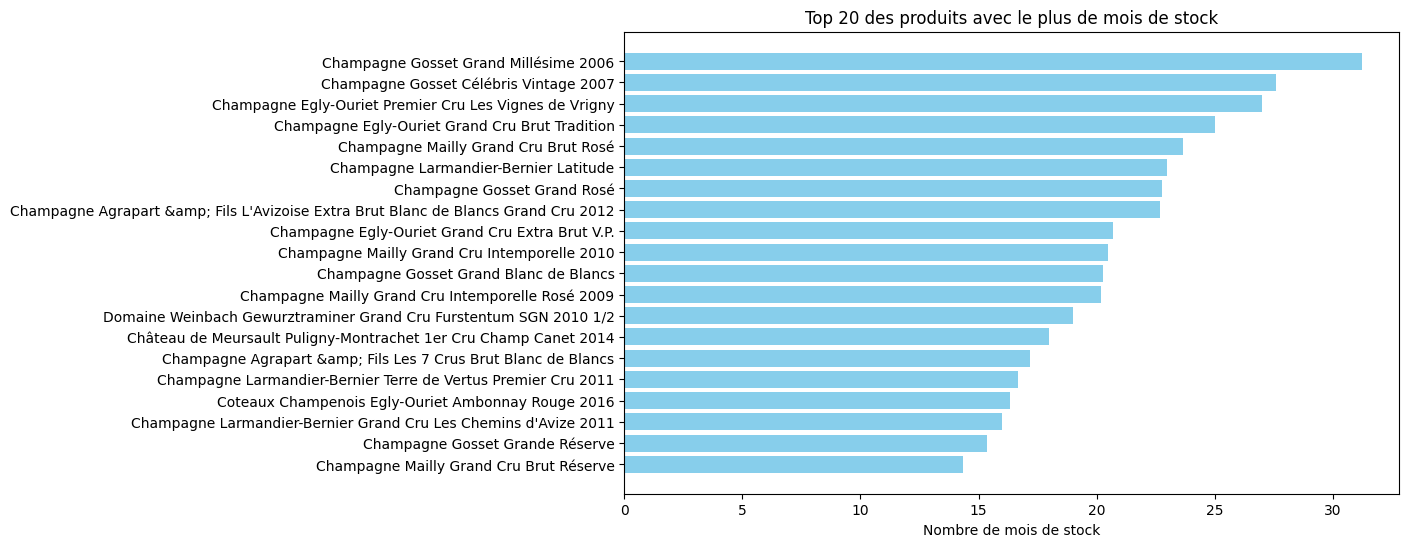

In [56]:
# Import de numpy
import numpy as np
import matplotlib.pyplot as plt

# Création de la colonne Rotation de stock (stock restant divisé par les ventes moyennes)
df_final['rotation_stock'] = df_final['stock_quantity'] / (df_final['total_sales'])

# Remplacement des "inf", -inf et NaN par 0
df_final['rotation_stock'].replace([np.inf, -np.inf], 0, inplace=True)
df_final['rotation_stock'].fillna(0, inplace=True)  # Remplacer les NaN par 0

# Effectuer le tri dans l'ordre décroissant du nombre de mois de stock
df_sorted_stock = df_final[df_final['rotation_stock'] > 0].sort_values(by='rotation_stock', ascending=False)

# Sélectionner les 20 produits avec le plus de mois de stock
top_20_stock = df_sorted_stock[['post_title', 'rotation_stock']].head(20)

# Afficher avec matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_20_stock['post_title'], top_20_stock['rotation_stock'], color='skyblue')
plt.xlabel('Nombre de mois de stock')
plt.title('Top 20 des produits avec le plus de mois de stock')
plt.gca().invert_yaxis()
plt.show()


In [57]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final['Valorisation_stock_euros'] = df_final['stock_quantity'] * df_final['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
valeur_totale_stock = df_final['Valorisation_stock_euros'].sum()
print(f"La valorisation totale des stocks en euros est : {valeur_totale_stock}")

La valorisation totale des stocks en euros est : 531946.2


In [58]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity


nombre_total_produits_stock = df_final['stock_quantity'].sum()
print(f"Le nombre total de produits en stock est : {nombre_total_produits_stock}")

Le nombre total de produits en stock est : 17822


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [59]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_final['prix_ht'] = df_final['price'] / 1.2

# Gérer les prix HT égaux à zéro pour éviter la division par zéro
df_final['prix_ht'] = df_final['prix_ht'].replace(0, np.nan)

#Création de la colonne Taux de marge avec gestion des cas où prix_ht est nul
df_final['taux_marge'] = np.where(df_final['prix_ht'].isna(),
                                  np.nan,
                                  ((df_final['prix_ht'] - df_final['purchase_price']) / df_final['prix_ht']) * 100)

# Remplacement des valeurs infinies par une valeur significative
df_final['taux_marge'] = df_final['taux_marge'].replace([np.inf, -np.inf], np.nan)

# Afficher le taux de marge minimum
taux_marge_min = df_final['taux_marge'].min()
print(f"Le taux de marge minimum est : {taux_marge_min:.2f}%")

# Afficher le taux de marge maximum
taux_marge_max = df_final['taux_marge'].max()
print(f"Le taux de marge maximum est : {taux_marge_max:.2f}%")


Le taux de marge minimum est : -634.99%
Le taux de marge maximum est : 47.76%


In [60]:
#affichage de la ligne avec un taux de marge inférieur à 0
articles_marge_negative = df_final[df_final['taux_marge'] < 0]
articles_marge_negative

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_date,...,post_title,guid,post_type,_merge,z_score,ca_par_article,rotation_stock,Valorisation_stock_euros,prix_ht,taux_marge
79,4355,1,12.65,97,instock,77.48,12589,12589,0.0,2018-03-02 10:46:10,...,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,https://www.bottle-neck.fr/?post_type=product&...,product,both,-0.734939,0.0,0.0,1227.05,10.541667,-634.988142
303,4864,0,8.30,0,outofstock,9.99,15154,NaN,NaN,NaT,...,NaN,NaN,NaN,left_only,-0.898195,NaN,0.0,0.00,6.916667,-44.433735
770,6324,0,92.00,18,instock,99.00,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,left_only,2.243074,NaN,0.0,1656.00,76.666667,-29.130435
820,7196,0,31.00,55,instock,31.20,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,left_only,-0.046262,NaN,0.0,1705.00,25.833333,-20.774194


In [61]:
#création d'un dataframe avec les taux positifs
df_taux_positifs = df_final[df_final['taux_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
taux_marge_min = df_taux_positifs['taux_marge'].min()
print(f"Taux de marge minimum : {taux_marge_min:.2f}%")

#Afficher le prix maximum de la colonne "taux_marge"
taux_marge_max = df_taux_positifs['taux_marge'].max()
print(f"Taux de marge maximum : {taux_marge_max:.2f}%")

Taux de marge minimum : 22.78%
Taux de marge maximum : 47.76%


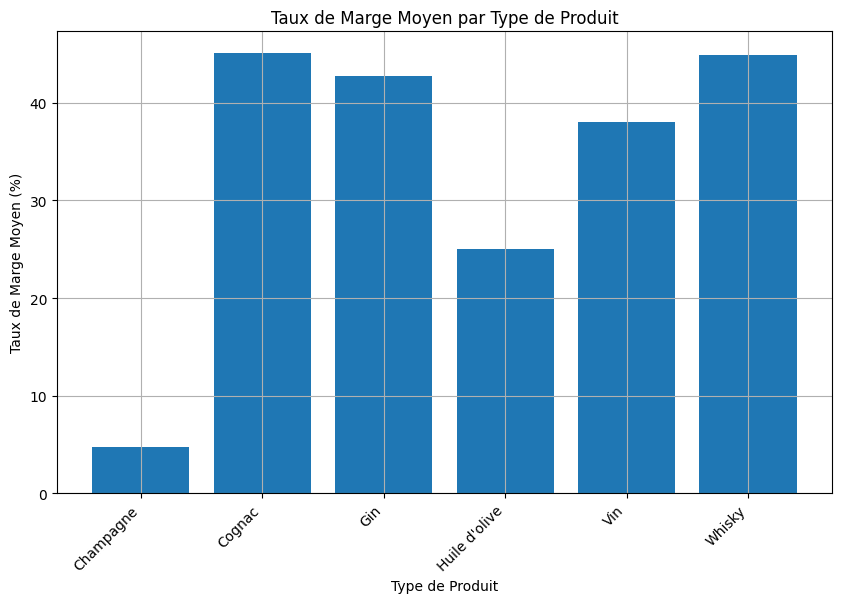

In [62]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_moyenne_par_type = df_final.groupby('product_type')['taux_marge'].mean().reset_index()

#Affichage dans un graphique du taux de marge par type de produit
plt.figure(figsize=(10, 6))
plt.bar(df_marge_moyenne_par_type['product_type'], df_marge_moyenne_par_type['taux_marge'])
plt.title("Taux de Marge Moyen par Type de Produit")
plt.xlabel("Type de Produit")
plt.ylabel("Taux de Marge Moyen (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

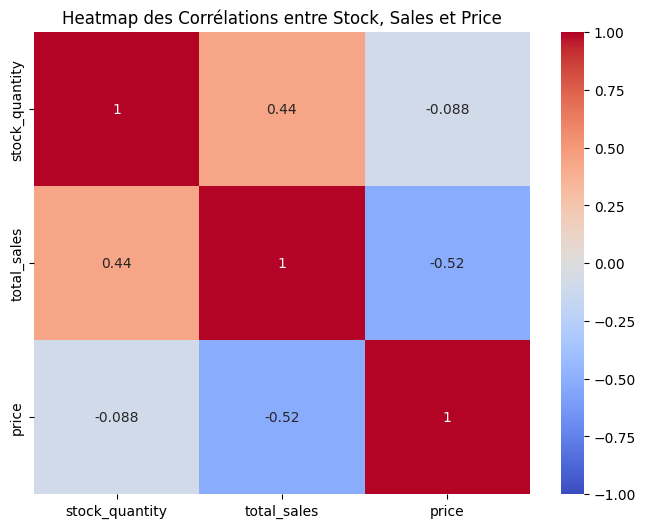

In [63]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price

# Sélection des colonnes pour l'analyse de corrélation
df_corr = df_final[['stock_quantity', 'total_sales', 'price']]
# Calcul de la matrice de corrélation
correlation_matrix = df_corr.corr()
# Création d'une heatmap avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap des Corrélations entre Stock, Sales et Price')
plt.show()





In [64]:
#Que peut-on conclure des correlations ?

# Plus il y a de stock, plus les ventes ont tendance à augmenter.
# Plus le prix est élevé, moins le produit se vend.
# Le stock disponible ne semble pas être fortement influencé par le prix des articles.
# Les corrélations entre les variables ne sont pas très fortes, aucune des variables n'a un impact décisif sur les autres.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [65]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
df_final.to_excel("df_final_result.xlsx", index=False)
